**The following program below is function which takes the "Year" as an input and gives the pie chart distribution for all the various types of goods transfered (in % to the total goods transfered) in that respective year. The type of good legend has been kept constant for all the years from 2008 to 2021, this will give us a clear picture of the change in the % of type of good over the years**

In [253]:
import pandas as pd
import plotly.io as pio
import plotly.express as px

In [254]:
df = pd.read_csv("Data_(Road)_1.csv")
df

,Year,Amount,Type of good
0,2008.0,"6,21,287",Total transported goods
1,NaN,NaN,Total transported goods
2,2009.0,"6,16,903",Total transported goods
3,NaN,NaN,Total transported goods
4,2010.0,"6,57,874",Total transported goods
...,...,...,...
655,NaN,NaN,Total transported goods
656,NaN,NaN,NaN
657,NaN,NaN,Total transported goods
658,NaN,NaN,NaN


In [255]:

df['Year'] = df['Year'].astype(str).str.replace('.0', '', regex=False)

df = df.dropna()

df['Amount'] = df['Amount'].map(lambda x: x.replace(',', ''))
df['Year'] = pd.Series(df['Year'], dtype='int')
df['Amount'] = pd.Series(df['Amount'], dtype='float')

C:\Users\Aditya Pavadad\AppData\Local\Temp\ipykernel_35320\983435893.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aditya Pavadad\AppData\Local\Temp\ipykernel_35320\983435893.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aditya Pavadad\AppData\Local\Temp\ipykernel_35320\983435893.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [256]:
types = df['Type of good'].unique()

In [257]:
df.groupby('Type of good').describe()

Year                    \
                                                   count    mean       std   
Type of good                                                                 
Basic metals; fabricated metal products, except...  15.0  2015.0  4.472136   
Chemicals, chemical products, and man-made fibe...  15.0  2015.0  4.472136   
Coal and lignite; crude petroleum and natural gas   15.0  2015.0  4.472136   
Coke and refined petroleum products                 15.0  2015.0  4.472136   
Equipment and material utilized in the transpor...  15.0  2015.0  4.472136   
Food products, beverages and tobacco                15.0  2015.0  4.472136   
Furniture                                           15.0  2015.0  4.472136   
Goods moved in the course of household and offi...  15.0  2015.0  4.472136   
Grouped goods0 a mixture of types of goods whic...  15.0  2015.0  4.472136   
Machinery and equipment                             15.0  2015.0  4.472136   
Mail, parcels                                       15.0  2015.0  4.472136   
Metal ores and other mining and quarrying produ...  15.0  2015.0  4.472136   
Other goods n.e.c.                                  15.0  2015.0  4.472136   
Other non metallic mineral products                 15.0  2015.0  4.472136   
Products of agriculture, hunting, and forestry;...  15.0  2015.0  4.472136   
Secondary raw materials                             15.0  2015.0  4.472136   
Textiles and textile products; leather and leat...  15.0  2015.0  4.472136   
Total transported goods                             15.0  2015.0  4.472136   
Transport equipment                                 15.0  2015.0  4.472136   
Unidentifiable goods0 goods which for any reaso...  15.0  2015.0  4.472136   
Wood and products                                   15.0  2015.0  4.472136   

                                                                            \
                                                       min     25%     50%   
Type of good                                                                 
Basic metals; fabricated metal products, except...  2008.0  2011.5  2015.0   
Chemicals, chemical products, and man-made fibe...  2008.0  2011.5  2015.0   
Coal and lignite; crude petroleum and natural gas   2008.0  2011.5  2015.0   
Coke and refined petroleum products                 2008.0  2011.5  2015.0   
Equipment and material utilized in the transpor...  2008.0  2011.5  2015.0   
Food products, beverages and tobacco                2008.0  2011.5  2015.0   
Furniture                                           2008.0  2011.5  2015.0   
Goods moved in the course of household and offi...  2008.0  2011.5  2015.0   
Grouped goods0 a mixture of types of goods whic...  2008.0  2011.5  2015.0   
Machinery and equipment                             2008.0  2011.5  2015.0   
Mail, parcels                                       2008.0  2011.5  2015.0   
Metal ores and other mining and quarrying produ...  2008.0  2011.5  2015.0   
Other goods n.e.c.                                  2008.0  2011.5  2015.0   
Other non metallic mineral products                 2008.0  2011.5  2015.0   
Products of agriculture, hunting, and forestry;...  2008.0  2011.5  2015.0   
Secondary raw materials                             2008.0  2011.5  2015.0   
Textiles and textile products; leather and leat...  2008.0  2011.5  2015.0   
Total transported goods                             2008.0  2011.5  2015.0   
Transport equipment                                 2008.0  2011.5  2015.0   
Unidentifiable goods0 goods which for any reaso...  2008.0  2011.5  2015.0   
Wood and products                                   2008.0  2011.5  2015.0   

                                                                   Amount  \
                                                       75%     max  count   
Type of good                                                                
Basic metals; fabricated metal products, except...  2018.5  2022.0   15.0  

In [258]:
df1 = df[15:].reset_index(drop = True)

In [259]:
df1.dtypes

Year              int32
Amount          float64
Type of good     object
dtype: object

In [260]:
import matplotlib.cm as cm

In [272]:
def get_data(y):
    df2 = df1[df1['Year'] == y]
    df4 = df[df['Type of good'] == 'Total transported goods']
    tot = df4[df4['Year'] == y]['Amount'].values
    
    df2.index = (df2['Amount']/tot*100).round(2).map(lambda x: str(x) + ' %')
    
    return df2, tot

def plot_pie(y):
    df, tot = get_data(y)
    df.plot.pie(y='Amount', figsize = (12, 12), legend = None, colormap = cmp, ylabel = '', title = f'{y} (Total = {tot[0]})');

In [273]:
cmp = cm.get_cmap('Spectral')

C:\Users\Aditya Pavadad\AppData\Local\Temp\ipykernel_35320\1785750545.py:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



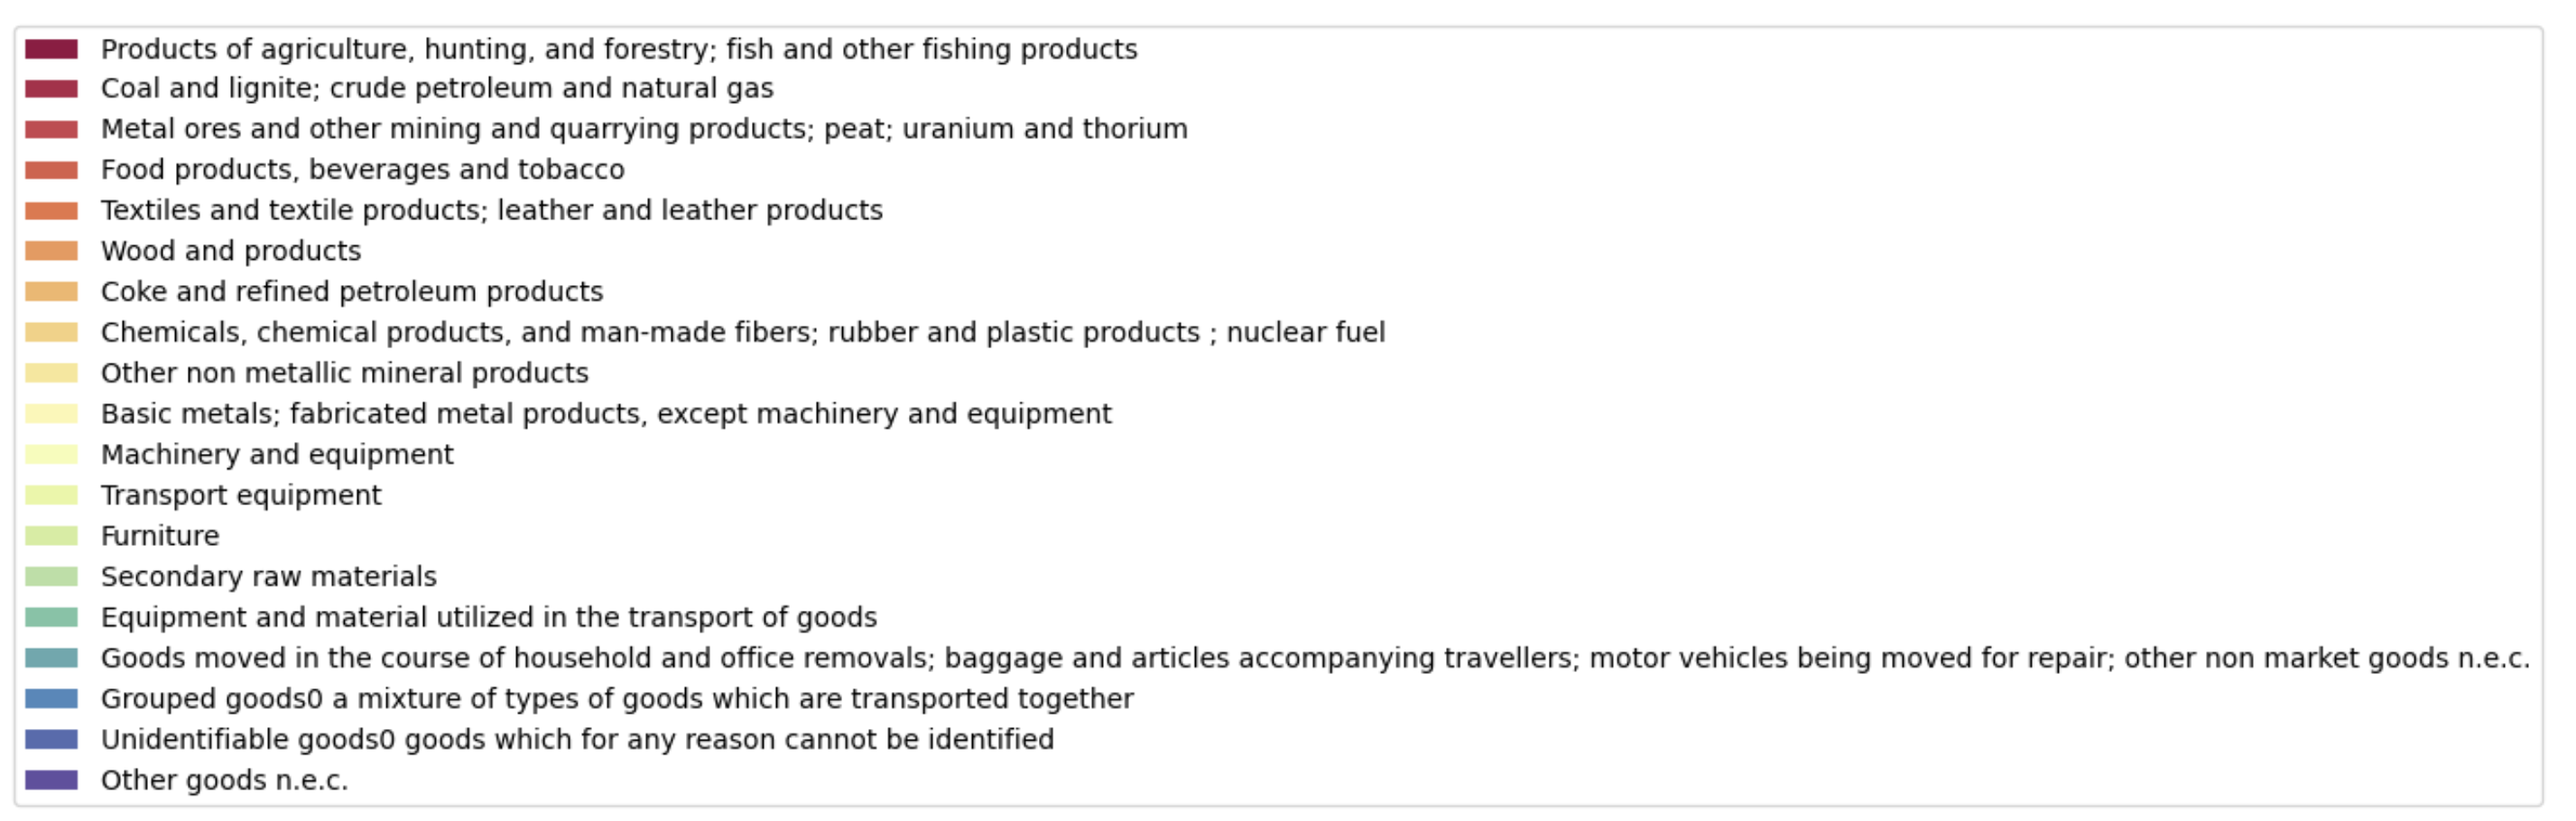

In [274]:
from IPython.display import Image

image_path = 'road_data_legend.png'  # Replace with the actual file path

Image(filename=image_path)

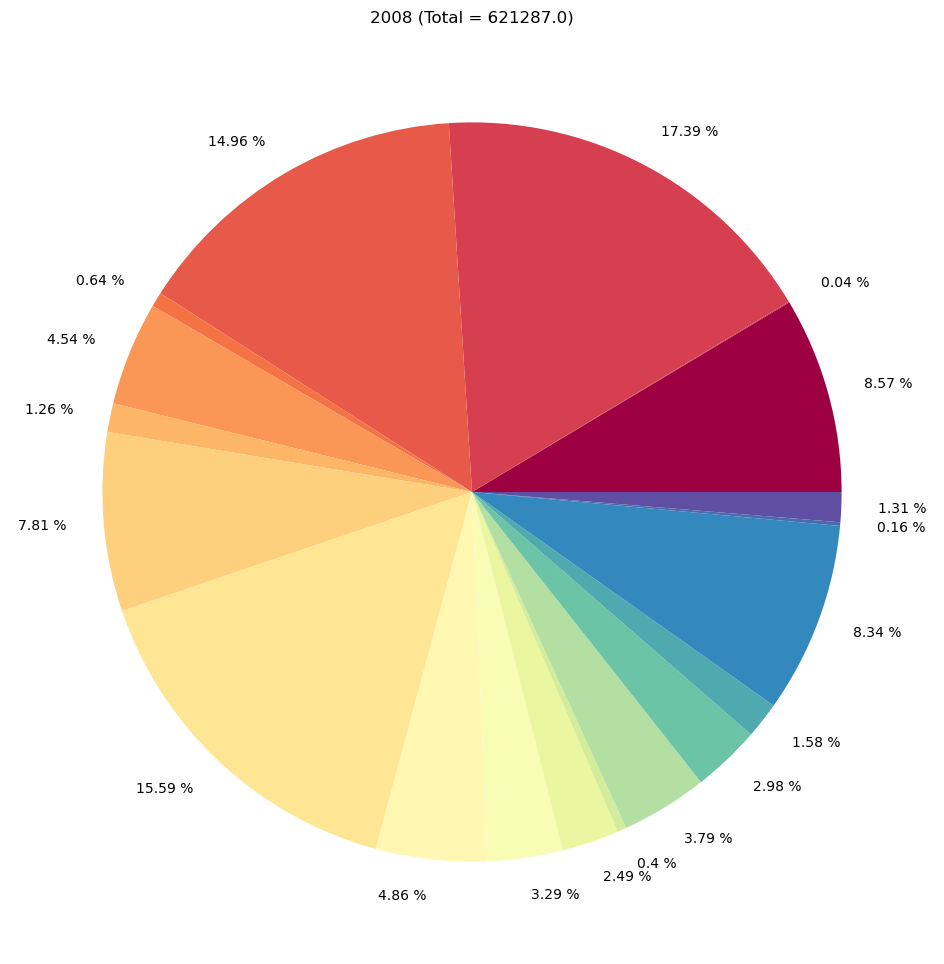

In [275]:
plot_pie(2008)

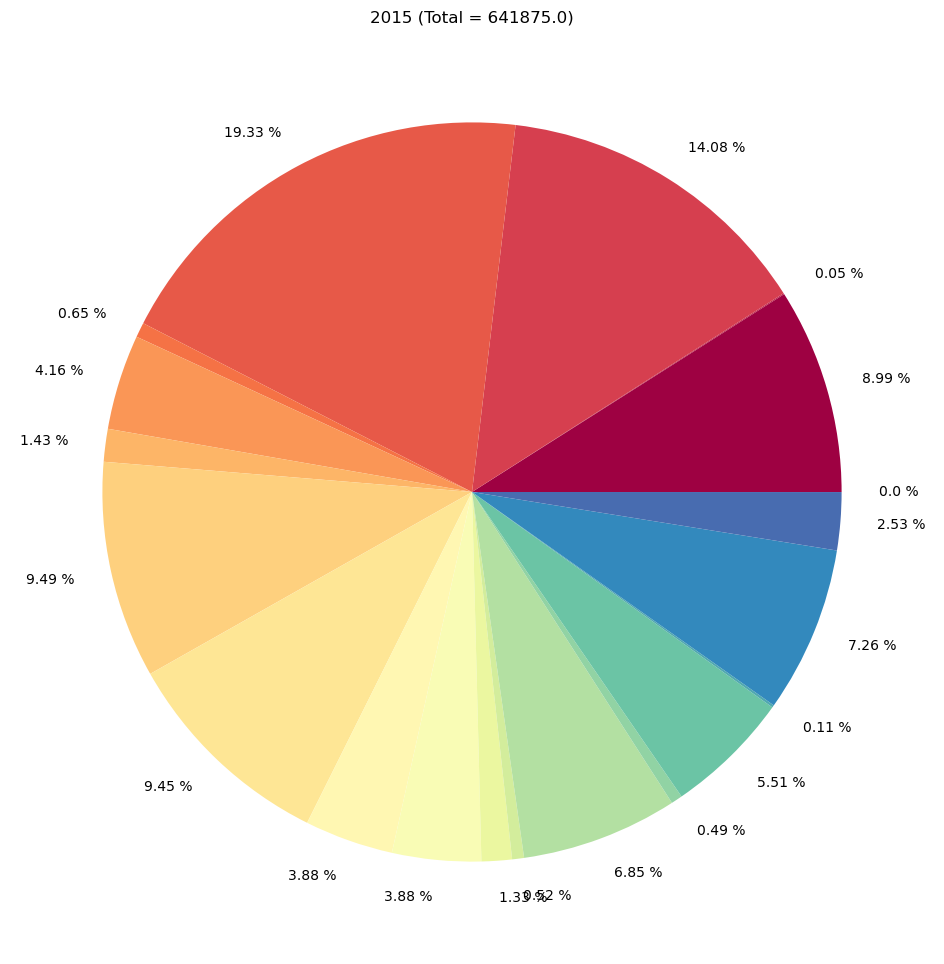

In [276]:
plot_pie(2015)

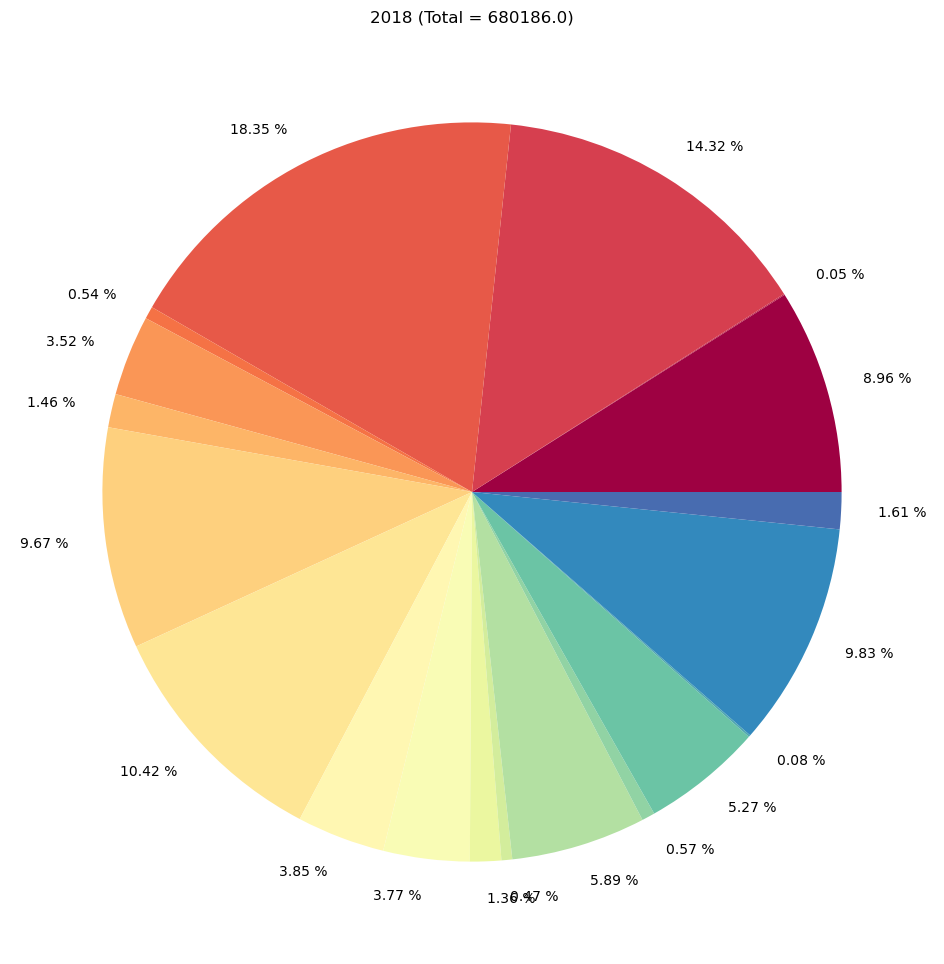

In [277]:
plot_pie(2018)

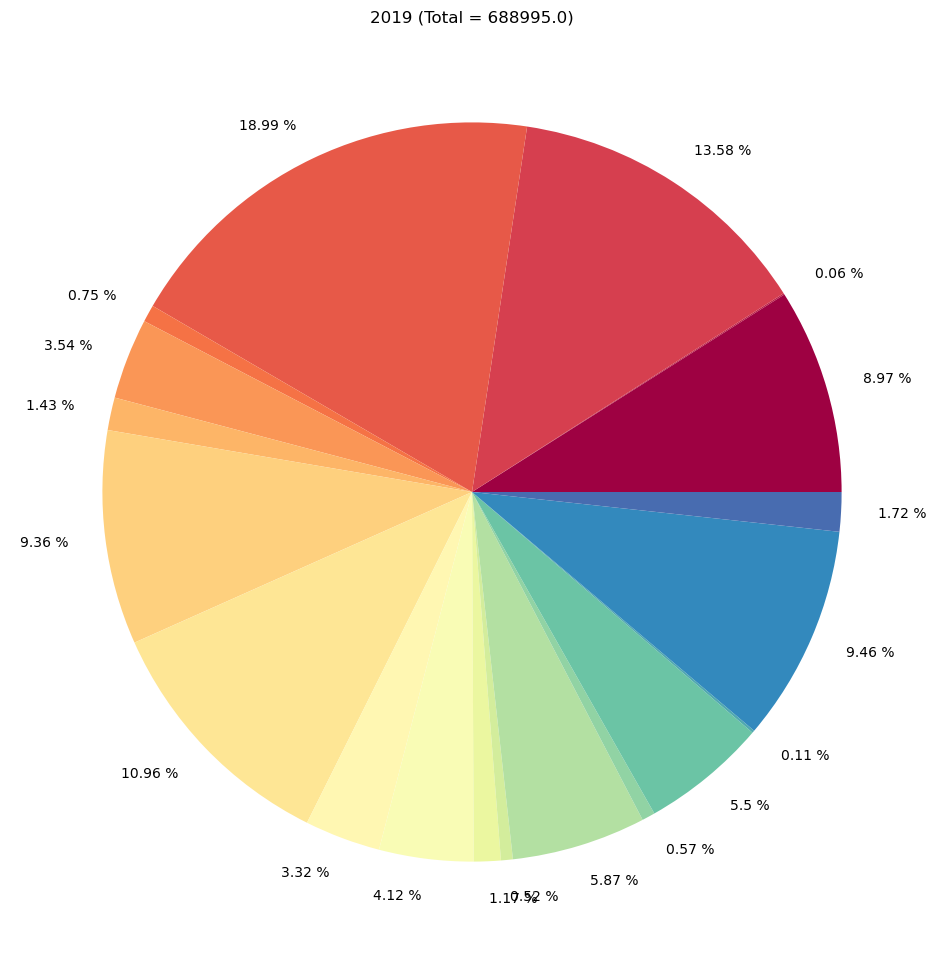

In [279]:
plot_pie(2019)

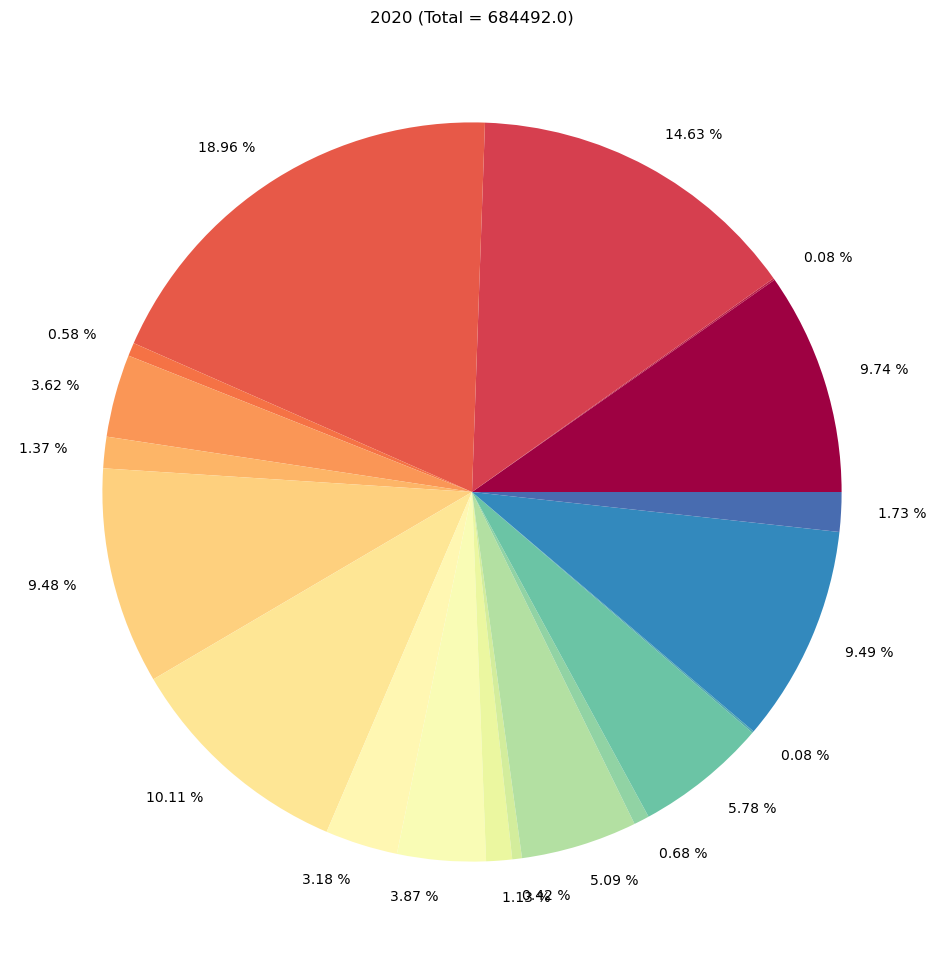

In [280]:
plot_pie(2020)

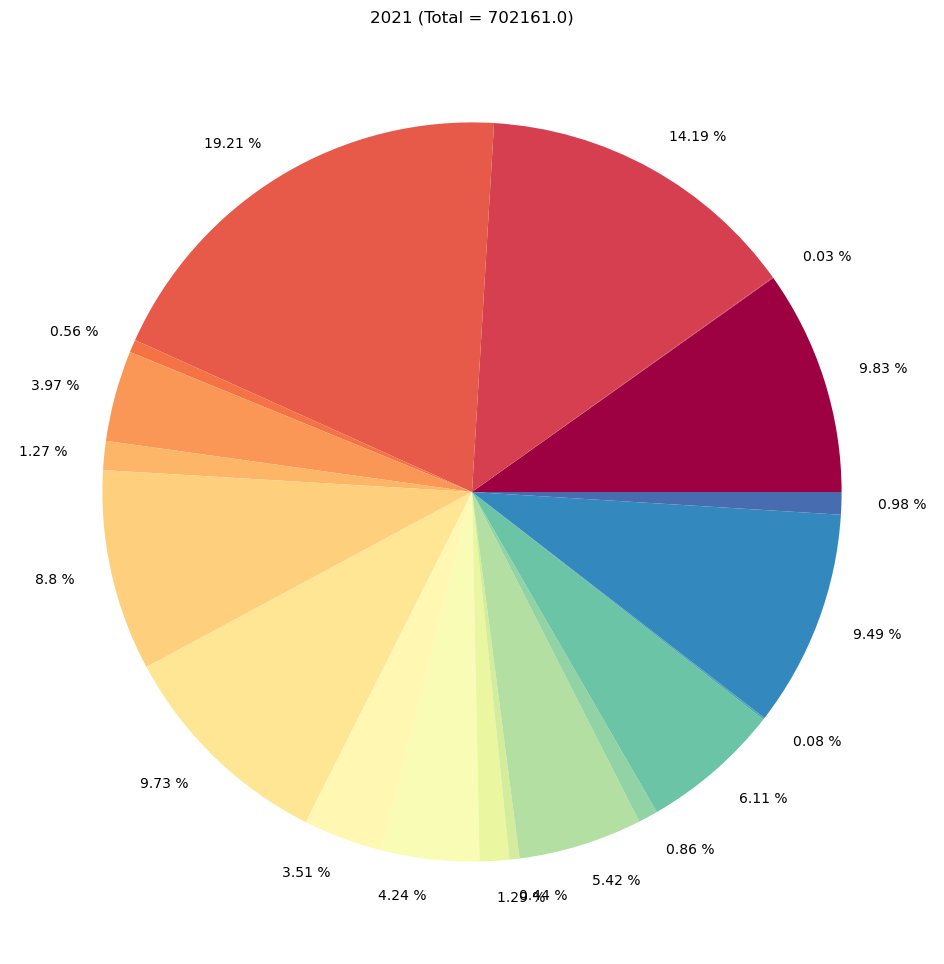

In [281]:
plot_pie(2021)